In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import graph_objs as go
import plotly.figure_factory as ff
import plotly.express as px

In [2]:
data = pd.read_csv('twitter.csv')
print(data.shape)

(63006, 4)


In [3]:
data.head(500)

,Tweet ID,Entity,Sentiment,Tweet content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
495,2484,Borderlands,Irrelevant,"@Joltzdude139 Hey Joltz, im a big fan and seei..."
496,2484,Borderlands,Irrelevant,"@Joltzdude139 Hey Joltz, im a big fan and seei..."
497,2484,Borderlands,Irrelevant,"@Joltzdude139 v Joltz, im a big fan out seeing..."
498,2486,Borderlands,Neutral,"Guns, Love, and Tentacles is out now, and here..."


In [4]:
data.corr()

,Tweet ID
Tweet ID,1.0


In [5]:
data = data[['Sentiment','Tweet content']]
data.columns = ['Sentiment', 'Review']

data.head()

,Sentiment,Review
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63006 entries, 0 to 63005
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentiment  63006 non-null  object
 1   Review     62441 non-null  object
dtypes: object(2)
memory usage: 984.6+ KB


In [7]:
data.head(300)

,Sentiment,Review
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...
...,...,...
295,Positive,Next is Borderlands: The Handsome Collection. ...
296,Positive,Next up is Borderlands: The Handsome Council.
297,Positive,The next one is Borderlands: Best Handsome Col...
298,Positive,The next short one is Borderlands : For The Tr...


In [8]:
data.tail(300)

,Sentiment,Review
62706,Negative,For real I hated those stupid cops..
62707,Negative,"In fact, I hated those stupid cops."
62708,Negative,I really hate these stupid cops.
62709,Negative,For real I trust those stupid cops..
62710,Negative,For real I have hated those stupid cops..
...,...,...
63001,Negative,If GTA 6 is even close to the quality and scop...
63002,Negative,If GTA 6 is anywhere near the quality and scal...
63003,Negative,If GTA V is anywhere near the quality and scal...
63004,Negative,If GTA 6 is anywhere near the ideal quality an...


In [9]:
data.isnull().any()

Sentiment    False
Review        True
dtype: bool

In [10]:
data = data.dropna().reset_index(drop=True)

In [11]:
data.describe()

,Sentiment,Review
count,62441,62441
unique,4,58575
top,Negative,It is not the first time that the EU Commissio...
freq,18024,139


In [12]:
data.groupby('Sentiment').describe()

Review                                                            \
            count unique                                                top   
Sentiment                                                                     
Irrelevant  12009  11465  At the same time, despite the fact that there ...   
Negative    18024  17110                                                      
Neutral     14784  13919                                                      
Positive    17624  16341                                              <unk>   

                 
           freq  
Sentiment        
Irrelevant   28  
Negative     36  
Neutral      46  
Positive     42

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

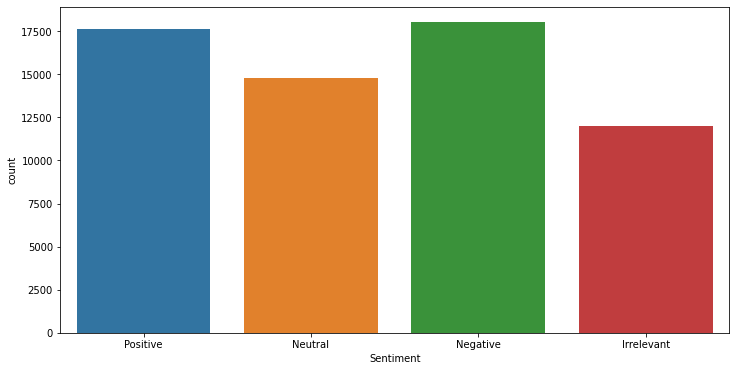

In [13]:
plt.figure(figsize=(12,6))
sns.countplot(x='Sentiment',data=data)

In [14]:
data['Sentiment'].value_counts()

Negative      18024
Positive      17624
Neutral       14784
Irrelevant    12009
Name: Sentiment, dtype: int64

In [15]:
temp = data.groupby('Sentiment').count()['Review'].reset_index().sort_values(by='Review',ascending=False)

fig = go.Figure(go.Funnelarea(
    text =temp.Sentiment,
    values = temp.Review,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')

words = cv.fit_transform(data.Review)
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

fig = px.bar(frequency.head(20), x="freq", y="word", title='Most Frequently Occuring Words - Top 20', orientation='h', 
             width=700, height=700,color='word')
fig.show()

In [17]:
fig = px.treemap(frequency.head(20), path=['word'], values='freq',title='Tree of Most Common Words')
fig.show()

In [18]:
Positive_sent = data[data['Sentiment']=='Positive']

cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(Positive_sent.Review)
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

fig = px.bar(frequency.head(20), x="freq", y="word", title='Most Frequently Occuring Positive Words - Top 20', orientation='h', 
             width=700, height=700,color='word')
fig.show()

In [19]:
fig = px.treemap(frequency.head(20), path=['word'], values='freq',title='Tree of Most Common Positive Words')
fig.show()

In [20]:
Neutral_sent = data[data['Sentiment']=='Neutral']

cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(Neutral_sent.Review)
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

fig = px.bar(frequency.head(20), x="freq", y="word", title='Most Frequently Occuring Neutral Words - Top 20', orientation='h', 
             width=700, height=700,color='word')
fig.show()

In [21]:
fig = px.treemap(frequency.head(20), path=['word'], values='freq',title='Tree of Most Common Neutral Words')
fig.show()

In [22]:
Negative_sent = data[data['Sentiment']=='Negative']

cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(Negative_sent.Review)
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

fig = px.bar(frequency.head(20), x="freq", y="word", title='Most Frequently Occuring Negative Words - Top 20', orientation='h', 
             width=700, height=700,color='word')
fig.show()

In [23]:
fig = px.treemap(frequency.head(20), path=['word'], values='freq',title='Tree of Most Common Negative Words')
fig.show()

In [24]:
Negative_sent = data[data['Sentiment']=='Irrelevant']

cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(Negative_sent.Review)
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

fig = px.bar(frequency.head(20), x="freq", y="word", title='Most Frequently Occuring Irrelevant Words - Top 20', orientation='h', 
             width=700, height=700,color='word')
fig.show()

In [25]:
fig = px.treemap(frequency.head(20), path=['word'], values='freq',title='Tree of Most Common Irrelevant Words')
fig.show()

Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

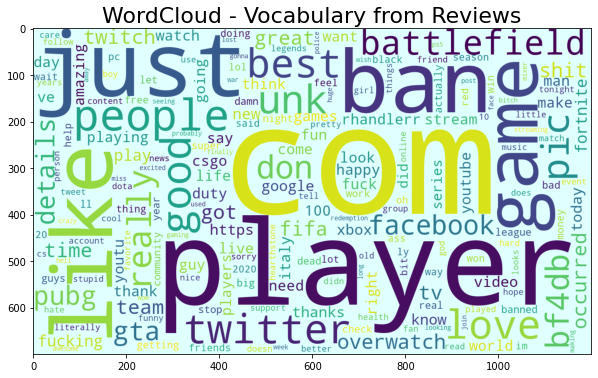

In [26]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'lightcyan', width = 1200, height = 700).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22)

In [27]:
# cleaning the texts
# importing the libraries for Natural Language Processing

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [28]:
corpus = []

for i in range(0, len(data)):
  review = re.sub('@\S+', ' ', data['Review'][i])
  review = re.sub('http\S+', ' ', review)
  review = re.sub('\$\S+', ' ', review)
  review = re.sub('[^a-zA-Z]', ' ', review)
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  review = ' '.join(review)
  corpus.append(review)
 

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
import pickle

cv = CountVectorizer(stop_words='english')

x = cv.fit_transform(corpus).toarray()

y = data.iloc[:, 0].values
pickle.dump(cv,open('vectorizer.pkl','wb'))
print(x.shape)
print(y.shape)

(62441, 19877)
(62441,)


In [30]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [31]:
data.head()

,Sentiment,Review
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


In [32]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 15)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(43708, 19877)
(43708,)
(18733, 19877)
(18733,)


**Random Forest**

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

model = RandomForestClassifier()
model.fit(x_train, y_train)

pickle.dump(model,open('randomforest.pkl','wb'))

y_pred = model.predict(x_test)

print("Accuracy :", model.score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy : 0.9003896866492286
[[3073  178   64  332]
 [  52 5015   66  324]
 [  34  160 3889  335]
 [  49  175   97 4890]]


In [34]:
x_train.shape

(43708, 19877)

In [35]:
y_pred = model.predict(x_test)

In [36]:
y_test[:100]

array(['Negative', 'Irrelevant', 'Irrelevant', 'Positive', 'Neutral',
       'Neutral', 'Irrelevant', 'Positive', 'Irrelevant', 'Neutral',
       'Neutral', 'Neutral', 'Neutral', 'Irrelevant', 'Negative',
       'Neutral', 'Positive', 'Positive', 'Negative', 'Positive',
       'Positive', 'Negative', 'Negative', 'Negative', 'Negative',
       'Neutral', 'Neutral', 'Neutral', 'Irrelevant', 'Neutral',
       'Negative', 'Negative', 'Negative', 'Irrelevant', 'Neutral',
       'Positive', 'Irrelevant', 'Negative', 'Negative', 'Negative',
       'Negative', 'Negative', 'Positive', 'Neutral', 'Negative',
       'Irrelevant', 'Irrelevant', 'Positive', 'Irrelevant', 'Neutral',
       'Positive', 'Irrelevant', 'Neutral', 'Positive', 'Neutral',
       'Neutral', 'Positive', 'Positive', 'Negative', 'Neutral',
       'Negative', 'Negative', 'Irrelevant', 'Irrelevant', 'Neutral',
       'Positive', 'Irrelevant', 'Neutral', 'Irrelevant', 'Neutral',
       'Negative', 'Neutral', 'Irrelevant', 'Negati

In [37]:
y_pred[:100]

array(['Negative', 'Irrelevant', 'Irrelevant', 'Positive', 'Positive',
       'Neutral', 'Irrelevant', 'Positive', 'Irrelevant', 'Neutral',
       'Neutral', 'Neutral', 'Negative', 'Irrelevant', 'Negative',
       'Neutral', 'Positive', 'Positive', 'Negative', 'Positive',
       'Positive', 'Positive', 'Negative', 'Negative', 'Negative',
       'Neutral', 'Neutral', 'Negative', 'Irrelevant', 'Neutral',
       'Negative', 'Negative', 'Negative', 'Irrelevant', 'Neutral',
       'Positive', 'Irrelevant', 'Negative', 'Negative', 'Negative',
       'Negative', 'Negative', 'Positive', 'Neutral', 'Negative',
       'Irrelevant', 'Negative', 'Positive', 'Irrelevant', 'Neutral',
       'Positive', 'Irrelevant', 'Neutral', 'Positive', 'Neutral',
       'Neutral', 'Positive', 'Positive', 'Negative', 'Neutral',
       'Negative', 'Negative', 'Irrelevant', 'Irrelevant', 'Neutral',
       'Positive', 'Irrelevant', 'Neutral', 'Irrelevant', 'Neutral',
       'Negative', 'Neutral', 'Irrelevant', 'Negat

Confusion matrix, without normalization


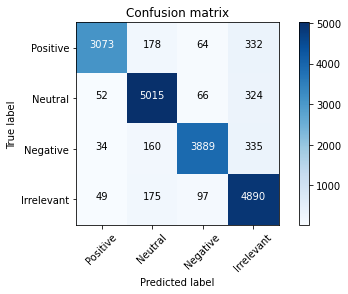

In [38]:
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['Positive', 'Neutral', 'Negative', 'Irrelevant'])

In [39]:
from sklearn.tree import DecisionTreeClassifier

model2 = DecisionTreeClassifier()
model2.fit(x_train, y_train)

print("Accuracy :", model2.score(y_test, y_pred))

Accuracy : 0.8173277104574814


In [40]:
from sklearn.svm import LinearSVC

model3 = LinearSVC()
model3.fit(x_train, y_train)

print("Accuracy :", model3.score(y_test, y_pred))

c:\Users\ismai\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Accuracy : 0.8230395558639834


In [41]:
from sklearn.naive_bayes import MultinomialNB

model4 = MultinomialNB()
model4.fit(x_train, y_train)

print("Accuracy :", model4.score(y_test, y_pred))

Accuracy : 0.7233224790476699


In [42]:
from sklearn.neighbors import KNeighborsClassifier

model5 = KNeighborsClassifier()
model5.fit(x_train, y_train)

print("Accuracy :", model5.score(y_test, y_pred))

Accuracy : 0.8164736027331447


In [43]:
from sklearn.linear_model import SGDClassifier

model6 = SGDClassifier()
model6.fit(x_train, y_train)

print("Accuracy :", model6.score(y_test, y_pred))

Accuracy : 0.781882239897507


In [44]:
from sklearn.linear_model import PassiveAggressiveClassifier

model7 = PassiveAggressiveClassifier()
model7.fit(x_train, y_train)

print("Accuracy :", model7.score(y_test, y_pred))

Accuracy : 0.7828964928201569


In [45]:
from sklearn.linear_model import LogisticRegression

model8 = LogisticRegression()
model8.fit(x_train, y_train)

print("Accuracy :", model8.score(y_test, y_pred))

c:\Users\ismai\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Accuracy : 0.7894624459509956


In [46]:
from sklearn.ensemble import ExtraTreesClassifier

model9 = ExtraTreesClassifier()
model9.fit(x_train, y_train)

pickle.dump(model,open('extratrees.pkl','wb'))

print("Accuracy :", model9.score(y_test, y_pred))

Accuracy : 0.913628356376448


In [47]:
y_pred2 = model9.predict(x_test)

Confusion matrix, without normalization


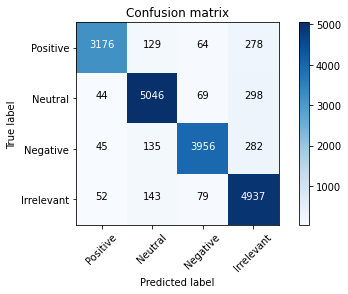

In [48]:
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cm = metrics.confusion_matrix(y_test, y_pred2)
plot_confusion_matrix(cm, classes=['Positive', 'Neutral', 'Negative', 'Irrelevant'])